# Import data from Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
# files present in dataset
!ls '/content/drive/MyDrive/CS267 Dataset/chest_xray/'

input_path = '/content/drive/MyDrive/CS267 Dataset/chest_xray/chest_xray/'

chest_xray  test  train  val


# Import Libraries

In [31]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import seaborn as sns
# from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn import metrics

import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img

# Input paths and data visualization

In [6]:
# paths for train, test and validate data

train_data = input_path + 'train/'
test_data = input_path + 'test/'
val_data = input_path + 'val/'

# training data sub-folders
os.listdir(train_data)
train_normal = train_data + 'NORMAL/'
train_pneumonia = train_data +'PNEUMONIA/'

Normal image title:  NORMAL2-IM-1206-0001.jpeg
Pneumonia image title:  person28_bacteria_142.jpeg


Text(0.5, 1.0, 'Pneumonia Image')

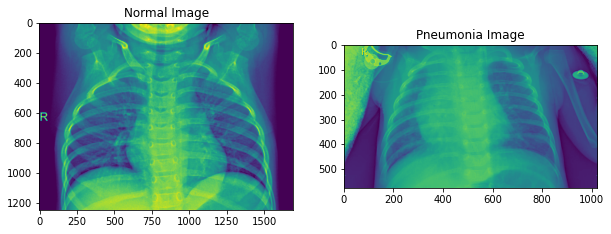

In [7]:
# normal images
train_normal_random = np.random.randint(0, len(os.listdir(train_normal)))
train_normal_image = os.listdir(train_normal)[train_normal_random]
print('Normal image title: ', train_normal_image)

normal_image_path = train_normal + train_normal_image

# pneumonial images
train_pneumonia_random = np.random.randint(0, len(os.listdir(train_pneumonia)))
train_pneumonia_image = os.listdir(train_pneumonia)[train_pneumonia_random]
print('Pneumonia image title: ', train_pneumonia_image)

pneumonia_image_path = train_pneumonia + train_pneumonia_image

# open the images
normal_image = image.imread(normal_image_path)
pneumonia_image = image.imread(pneumonia_image_path)

# plot the images usig matplotlib
figure = plt.figure(figsize = (10, 6))
image1 = figure.add_subplot(1, 2, 1)
img_plot = plt.imshow(normal_image)
image1.set_title('Normal Image')

image2 = figure.add_subplot(1, 2, 2)
img_plot = plt.imshow(pneumonia_image)
image2.set_title('Pneumonia Image')


# Build the CNN model

In [22]:
# create a Sequential CNN modes

cnn = Sequential()

# 1st convolution layer
cnn.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (64, 64, 3)))

# 1st pooling layer
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# 2nd convolution layer
cnn.add(Conv2D(32, (3, 3), activation = 'relu'))

# 2nd pooling layer
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# flatten the layer
cnn.add(Flatten())

# add the final two fully connected layers
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'sigmoid', units = 1))

In [23]:
# compile the Neural Network
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fit the data to the CNN model

In [43]:
# using ImageDataGenerator for data augmentation

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
train_dataset = train_datagen.flow_from_directory(train_data, target_size = (64, 64), batch_size = 32, class_mode = 'binary')
test_dataset = test_datagen.flow_from_directory(test_data, target_size = (64, 64), batch_size = 32, class_mode = 'binary')
val_dataset = test_datagen.flow_from_directory(val_data, target_size = (64, 64), batch_size = 32, class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [20]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 93312)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [14]:
batch_size = 16

steps_per_epoch = len(train_dataset) // batch_size
print('Number of steps per epoch: ', steps_per_epoch)

validation_steps = len(test_dataset) // batch_size
print('Number of validation steps: ', validation_steps)

steps = len(test_dataset) // batch_size
print('Steps for evaluation: ', steps)

Number of steps per epoch:  10
Number of validation steps:  1
Steps for evaluation:  1


In [26]:
cnn_model = cnn.fit(train_dataset, steps_per_epoch = steps_per_epoch, epochs = 50, validation_steps = validation_steps, batch_size = batch_size, validation_data = val_dataset)

Epoch 1/50
10/10 [==============================] - 94s 9s/step - loss: 0.6992 - accuracy: 0.7531 - val_loss: 0.8364 - val_accuracy: 0.5000
Epoch 2/50
10/10 [==============================] - 85s 8s/step - loss: 0.5504 - accuracy: 0.7563 - val_loss: 0.8443 - val_accuracy: 0.5000
Epoch 3/50
10/10 [==============================] - 87s 9s/step - loss: 0.5225 - accuracy: 0.7437 - val_loss: 0.8133 - val_accuracy: 0.5000
Epoch 4/50
10/10 [==============================] - 78s 8s/step - loss: 0.4906 - accuracy: 0.7437 - val_loss: 0.5962 - val_accuracy: 0.6250
Epoch 5/50
10/10 [==============================] - 73s 7s/step - loss: 0.3971 - accuracy: 0.8438 - val_loss: 0.5554 - val_accuracy: 0.6875
Epoch 6/50
10/10 [==============================] - 61s 6s/step - loss: 0.3980 - accuracy: 0.8219 - val_loss: 0.6317 - val_accuracy: 0.6250
Epoch 7/50
10/10 [==============================] - 66s 7s/step - loss: 0.3966 - accuracy: 0.8062 - val_loss: 0.4025 - val_accuracy: 0.8125
Epoch 8/50
10/10 [==

In [47]:
test_accuracy = cnn.evaluate(test_dataset, steps = steps, batch_size = batch_size)

1/1 [==============================] - 1s 503ms/step - loss: 0.3479 - accuracy: 0.8125


In [48]:
predict = cnn.predict(test_dataset)

In [49]:
labels = (predict > 0.5).astype('int32')

In [50]:
print(metrics.classification_report(test_dataset.classes, labels))

              precision    recall  f1-score   support

           0       0.42      0.22      0.29       234
           1       0.64      0.82      0.72       390

    accuracy                           0.59       624
   macro avg       0.53      0.52      0.50       624
weighted avg       0.55      0.59      0.55       624



AUC for ROC: 0.48119658119658115
 


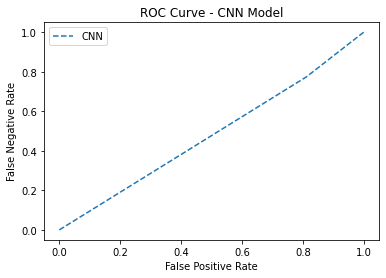

In [33]:
get_roc_curve(test_dataset.labels, labels, 'CNN Model', 'CNN')

AUR for PR: 0.7646028767979988



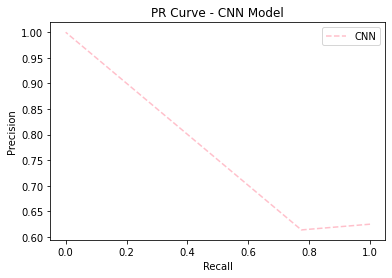

In [34]:
get_pr_curve(test_dataset.labels, labels, 'CNN Model', 'CNN')

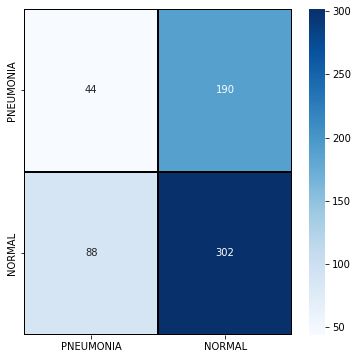

In [37]:
get_confusion_matrix(test_dataset.labels, labels)

In [ ]:
print('Testing accuracy: ', test_accuracy[1] * 100)

Testing accuracy:  93.75


# Graph Plots

In [36]:
def get_roc_curve(y_test, y_predict, title, label):
    fpr, tpr, _ = metrics.roc_curve(y_true = y_test, y_score = y_predict)
    auc_roc = metrics.roc_auc_score(y_true = y_test, y_score = y_predict)
    print('AUC for ROC: %s\n ' % auc_roc)

    plt.plot(fpr, tpr, linestyle = '--', label = label)
    plt.xlabel('False Positive Rate')
    plt.ylabel('False Negative Rate')
    plt.title('ROC Curve - ' + title)
    plt.legend()
    plt.show()

def get_pr_curve(y_test, y_predict, title, label):
    precision, recall, _ = metrics.precision_recall_curve(y_true = y_test, probas_pred = y_predict)
    auc_pr = metrics.auc(recall, precision)
    print('AUR for PR: %s\n' % auc_pr)

    plt.plot(recall, precision, linestyle = '--', color = 'pink', label = label)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('PR Curve - ' + title)
    plt.legend()
    plt.show()

def get_confusion_matrix(y_test, y_predict):
    c_matrix = metrics.confusion_matrix(y_test, y_predict)
    plt.figure(figsize = (6,6))
    labels = ['PNEUMONIA', 'NORMAL']
    sns.heatmap(c_matrix ,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='', xticklabels = labels, yticklabels = labels)